<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis? 
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 




## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"
!pip install -U ucimlrepo
!pip install -U seaborn==0.9.0

  Using cached seaborn-0.9.0-py3-none-any.whl (208 kB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [2]:
from ucimlrepo import fetch_ucirepo
from datetime import datetime
from scipy.stats.mstats import normaltest
from scipy.stats import boxcox
from scipy.special import boxcox1p, inv_boxcox
from scipy.stats import boxcox_normmax
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, PolynomialFeatures)
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats 
from scipy import stats as stat
import numpy as np

## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [3]:
# fetch dataset 
flowers = fetch_ucirepo(id=186) 

# data (as pandas dataframes) 
X = flowers.data.features 
y = flowers.data.targets

#get the data from the dataset
data = flowers.data.original

Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


In [4]:
# The report will be focused on prediction.
# The dataset that I chose is the Iris dataset from Fisher, 1936. The dataset contains three classes with fifty instances each, with every class referring to an Iris plant. The dataset contains four features related to the sepal and petal lengths and widths, along with the class representing the type of Iris plant being studied.

In [5]:
# metadata 
flowers.metadata

{'uci_id': 53,
 'name': 'Iris',
 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris',
 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv',
 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n',
 'area': 'Biology',
 'tasks': ['Classification'],
 'characteristics': ['Tabular'],
 'num_instances': 150,
 'num_features': 4,
 'feature_types': ['Real'],
 'demographics': [],
 'target_col': ['class'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 1936,
 'last_updated': 'Tue Sep 12 2023',
 'dataset_doi': '10.24432/C56C76',
 'creators': ['R. A. Fisher'],
 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica',
  'authors': 'A. Unwin, K. Kleinman',
  'published_in': 'Significance, 2021',
  'year': 2021,
  'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e',
  '

In [6]:
# variable information 
flowers.variables

,name,role,type,demographic,description,units,missing_values
0,sepal length,Feature,Continuous,None,None,cm,no
1,sepal width,Feature,Continuous,None,None,cm,no
2,petal length,Feature,Continuous,None,None,cm,no
3,petal width,Feature,Continuous,None,None,cm,no
4,class,Target,Categorical,None,"class of iris plant: Iris Setosa, Iris Versico...",None,no


In [7]:
#get statistics for the features
X.quantile([0.01, 0.25, 0.5, 0.75, 0.99])

,sepal length,sepal width,petal length,petal width
0.01,4.4,2.200,1.149,0.1
0.25,5.1,2.800,1.600,0.3
0.50,5.8,3.000,4.350,1.3
0.75,6.4,3.300,5.100,1.8
0.99,7.7,4.151,6.700,2.5


In [8]:
#obtain summary statistics for the features
X.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
#check data for null values
X.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
dtype: int64

In [10]:
#convert the target into integer values as placeholders for the names
mapping = {'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}

#replace the string representations with integer representations
data = data.replace({'class': mapping})
y = y.replace({'class': mapping})

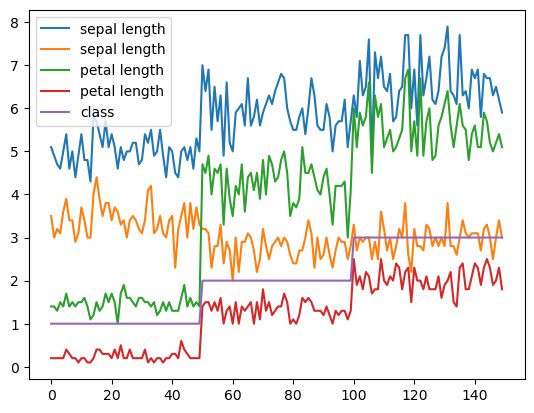

In [11]:
#plot the data
plt.plot(data)

#show the legend for the data columns
plt.legend(['sepal length', 'sepal length', 'petal length', 'petal length', 'class'])

#show the plot
plt.show()

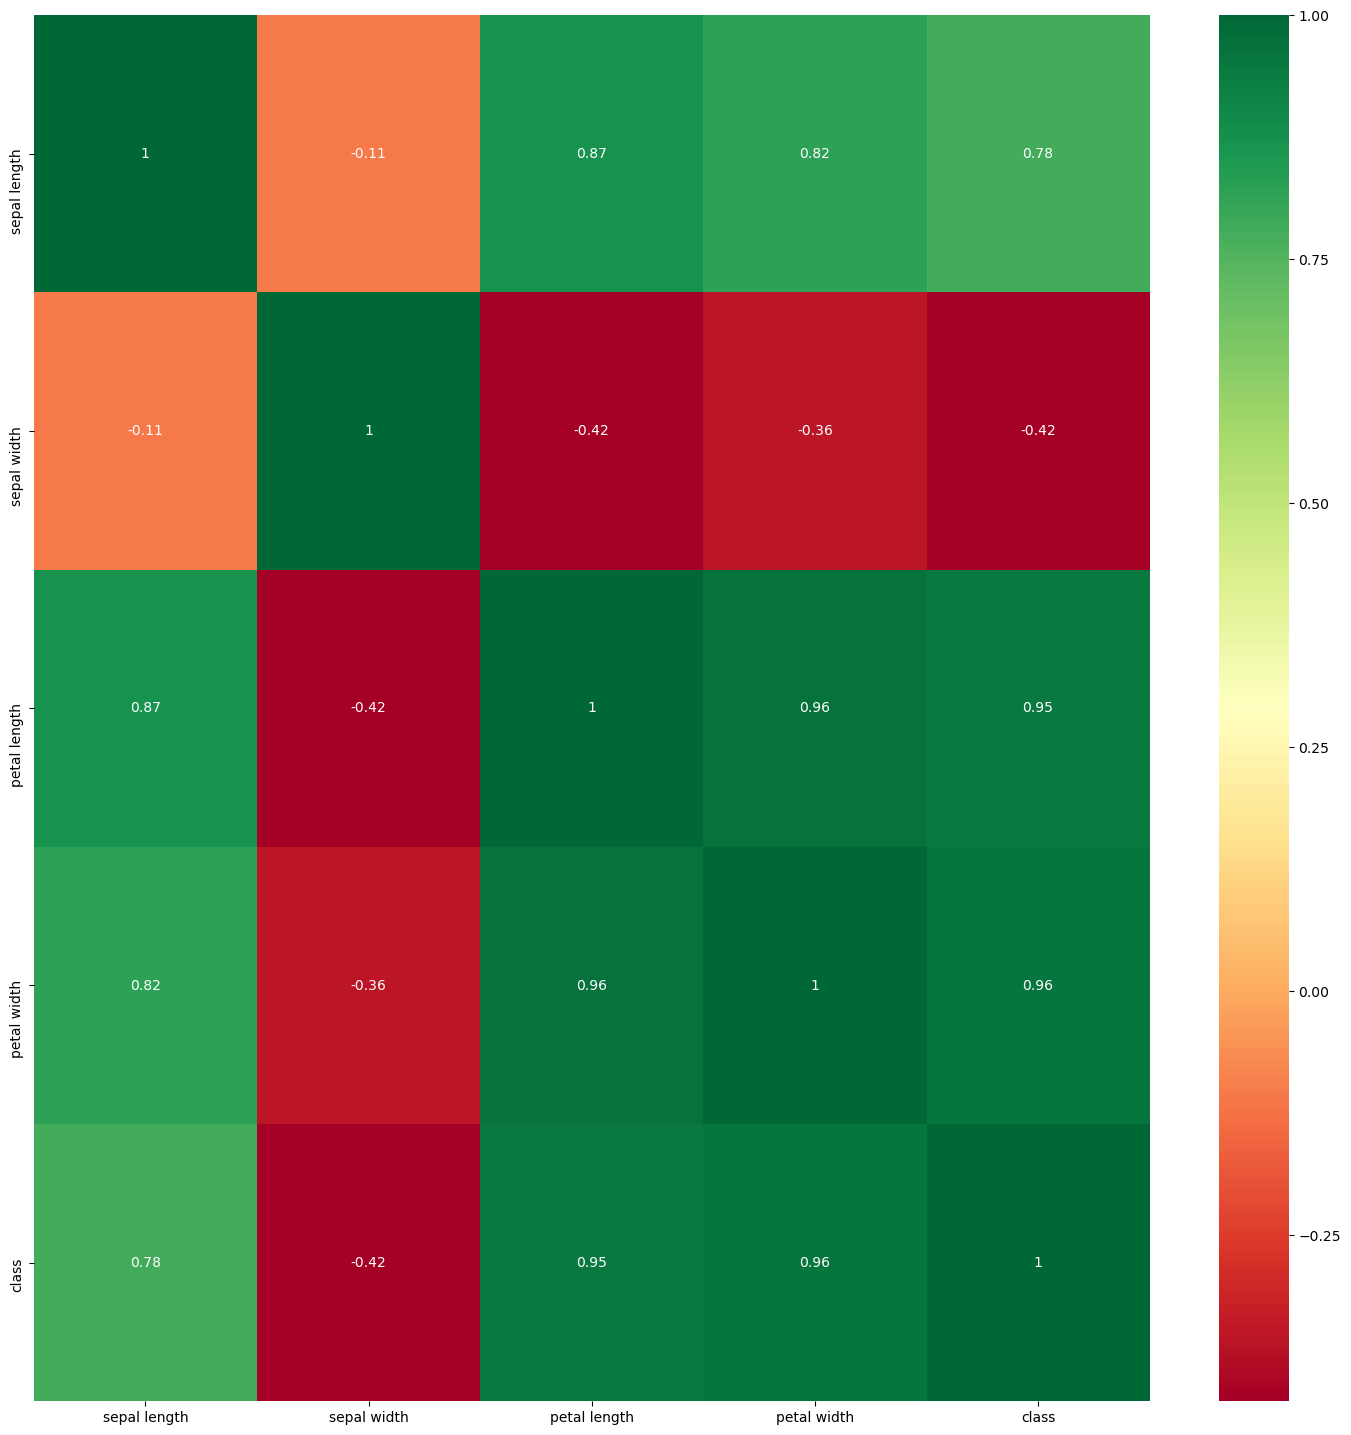

In [12]:
#plot the heatmap diagram wtih the given settings
plt.figure(figsize=(18,18))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

#show the heatmap
plt.show()

In [13]:
# Data variables, quantile information, summary statistics, and null value checks are preformed to determine dataset information integrity. A plot of the sepal length and width, along with the petal length and width are displayed with their associated class of flower. Furthermore, a heatmap is used to depict the correlations between different columns of the dataset. Finally, a histogram is used to show that there are fifty samples for each flower in the associated dataset, and that all one-hundred and fifty flowers are converted to integer representations for the linear regression step.

# 2. Objectives


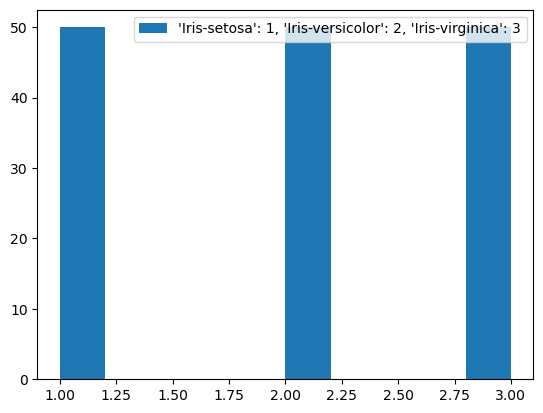

In [14]:
#show the histogram plot for the target variables
plt.hist(y)

#show the legend for the histogram
plt.legend(["""'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3"""])

In [15]:
#define the linear regression function
lr = LinearRegression()

# 3. Linear Regression Models


In [16]:
# The best model to use is the one with a degree of two as it had the highest R-squared score. We know that one class is linearly separable from the other two classes due to it having a high petal length relative to its other dimensions, and that the other two classes are not linearly separable from one another since they do not have strong features to differentiate each other from. Two degrees for polynomial regression can be used to determine the three separate classes of variables since one degree can be used for petal length to separate one class from the other two, and another degree can be used to separate the remaining two classes from each other.

In [17]:
#define the polynomial features for the regression
pf = PolynomialFeatures(degree = 2, include_bias = False)

#fir the X data
X_pf = pf.fit_transform(X)

#get the training and testing datasets
X_trainOne, X_testOne, y_trainOne, y_testOne = train_test_split(X_pf, y, test_size = 0.3, random_state = 72018)

#transform the training data
s = StandardScaler()
X_train_s = s.fit_transform(X_trainOne)

#fit the data
lr.fit(X_train_s, y_trainOne)

#transform the testing data
X_test_s = s.transform(X_testOne)

#predict the testing data using the linear regression model
y_pred_bc = lr.predict(X_test_s)

#obrain the R^2 score
r2_score(y_testOne, y_pred_bc)

0.9361737337310533

In [18]:
#define the polynomial features for the regression
pf = PolynomialFeatures(degree = 3, include_bias = False)

#fir the X data
X_pf = pf.fit_transform(X)

#get the training and testing datasets
X_trainOne, X_testOne, y_trainOne, y_testOne = train_test_split(X_pf, y, test_size = 0.3, random_state = 72018)

#transform the training data
s = StandardScaler()
X_train_s = s.fit_transform(X_trainOne)

#fit the data
lr.fit(X_train_s, y_trainOne)

#transform the testing data
X_test_s = s.transform(X_testOne)

#predict the testing data using the linear regression model
y_pred_bc = lr.predict(X_test_s)

#obrain the R^2 score
r2_score(y_testOne, y_pred_bc)

0.8433251863794418

In [19]:
#define the polynomial features for the regression
pf = PolynomialFeatures(degree = 3, include_bias = True)

#fir the X data
X_pf = pf.fit_transform(X)

#get the training and testing datasets
X_trainOne, X_testOne, y_trainOne, y_testOne = train_test_split(X_pf, y, test_size = 0.3, random_state = 72018)

#transform the training data
s = StandardScaler()
X_train_s = s.fit_transform(X_trainOne)

#fit the data
lr.fit(X_train_s, y_trainOne)

#transform the testing data
X_test_s = s.transform(X_testOne)

#predict the testing data using the linear regression model
y_pred_bc = lr.predict(X_test_s)

#obrain the R^2 score
r2_score(y_testOne, y_pred_bc)

0.533853671465681

In [20]:
#define the polynomial features for the regression
pf = PolynomialFeatures(degree = 1, include_bias = False)

#fir the X data
X_pf = pf.fit_transform(X)

#get the training and testing datasets
X_trainOne, X_testOne, y_trainOne, y_testOne = train_test_split(X_pf, y, test_size = 0.3, random_state = 72018)

#transform the training data
s = StandardScaler()
X_train_s = s.fit_transform(X_trainOne)

#fit the data
lr.fit(X_train_s, y_trainOne)

#transform the testing data
X_test_s = s.transform(X_testOne)

#predict the testing data using the linear regression model
y_pred_bc = lr.predict(X_test_s)

#obrain the R^2 score
r2_score(y_testOne, y_pred_bc)

0.932062765252852

In [21]:
# Polynomial regression is used with a random state of 72018 and a testing size of 0.3. Bias is not included, and three separate tests are run using degrees of 1, 2, and 3.
#    With a degree of 2, we see that the R2 score is 0.9361737337310533.
#    With a degree of 3, we see that the R2 score is 0.8433251863794418.
#    With a degree of 1, we see that the R2 score is 0.932062765252852.
# When bias is included, we notice a change for tests with a degree of 3:
#    With a degree of 3, we see that the R2 score is 0.533853671465681.


# 4. Insights and key findings


In [22]:
# Petal length and width are strongly correlated with class, whereas sepal width are negatively correlated with plant class.
# Linear regression can be used to create a strong fit with the dataset, meaning sepal and petal length and width can be used to predict the plant species class.
# Using two degrees without bias results in the strongest fit for linear regression.

# 5. Next Steps


In [23]:
# Using models other then linear regression to analyze the data, such as polynomial regression, ridge regression, or lasso regression. Such methods can be used to help resolve bias in the data, and make better predictions given that the length and width measures in the data are heavily correlated with one another.
# Adding more entries to the dataset, with a wider diversity of samples or species of flowers.
# Adding more measurement for the flowers being analyzed by the model.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
